# Scikit-Learn

## Exploratory analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

In [3]:
%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.6.x

1.7.2


---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [4]:
digits = datasets.load_digits()

In [5]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


Randomly select the training and test dataset.

<span style="color:red">Implement your solution below</span>

In [6]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [7]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [9]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 8, 5, 2, 1, 1, 7, 0, 4, 8, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 2, 5, 6, 0, 9, 0, 0, 1, 7, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 5, 7, 7, 0, 4, 5, 5, 5, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 1, 3, 5, 2, 8, 0, 4, 7, 4, 3, 5, 3, 1, 8, 5, 7, 4, 2,
       7, 7, 7, 6, 1, 9, 8, 7, 8, 7, 2, 6, 9, 4, 5, 7, 8, 7, 5, 8, 5, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 2, 3, 3, 7, 7, 2, 3, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 8, 1, 3,
       7, 7, 2, 8, 3, 9, 8, 0, 3, 8, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 8, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 8, 8, 6, 0, 4, 5,
       8, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 4, 1, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 7, 8, 6, 0, 8, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 7, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8472222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360



#### Confusion matrix

Use the class [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the created object allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below</span>

In [11]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]


]#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

In [12]:
def plot_digit(idx, xs, ys=None, pred_ys=None):
    if ys is not None:
        print(f"Digit value:\t{ys[idx]}")
    if pred_ys is not None:
        print(f"Prediction:\t{pred_ys[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs[idx].reshape(8, -1),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )
    plt.axis("off")
    plt.show()

<span style="color:red">Implement your solution below</span>

In [13]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
print("report_dict keys:", report_dict.keys())

f1_scores = {int(label): metrics['f1-score'] for label, metrics in report_dict.items()
             if label not in ['accuracy', 'macro avg', 'weighted avg']}
lowest_f1_class = min(f1_scores, key=f1_scores.get)
print("Lowest f1-score class:", lowest_f1_class)

misclassified_idx = np.where((y_test != y_pred) & (y_test == lowest_f1_class))[0]
print(f"Number of misclassified instances in class '{lowest_f1_class}':", len(misclassified_idx))


report_dict keys: dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg'])
Lowest f1-score class: 8
Number of misclassified instances in class '8': 4


Digit value:	8
Prediction:	1


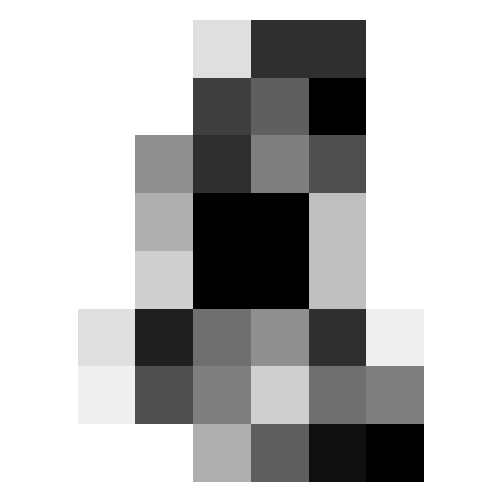

Digit value:	8
Prediction:	1


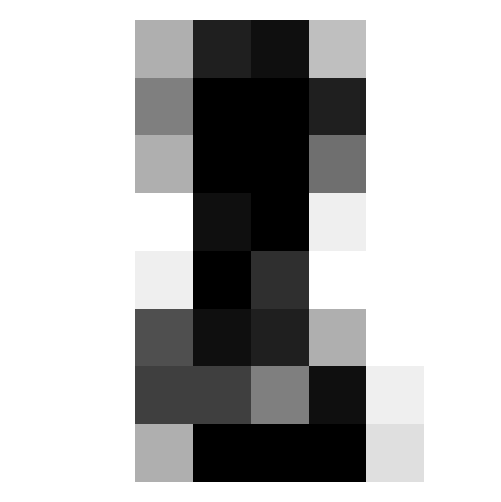

Digit value:	8
Prediction:	7


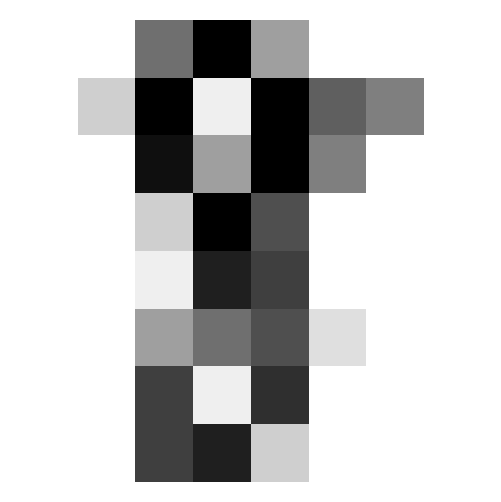

Digit value:	8
Prediction:	7


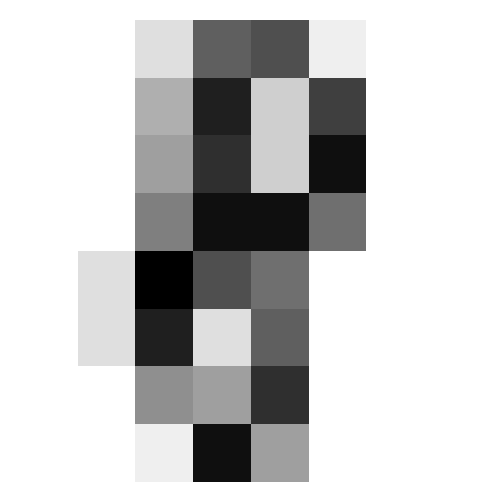

In [14]:
for idx in misclassified_idx:
    plot_digit(idx, X_test, ys=y_test, pred_ys=y_pred)

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below</span>

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Model training

<span style="color:red">Implement your solution below</span>

In [16]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

,priors,None
,var_smoothing,1e-09


In [17]:
y_pred_pca = gnb.predict(X_test_pca)

#### Evaluation

<span style="color:red">Implement your solution below</span>

In [18]:
accuracy_score_pca = accuracy_score(y_test, y_pred_pca)
accuracy_score_pca

0.9138888888888889

In [19]:
report_dict_pca = classification_report(y_test, y_pred_pca)
print(report_dict_pca)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.69      0.89      0.78        28
           2       1.00      0.97      0.98        33
           3       0.97      0.91      0.94        34
           4       0.98      0.98      0.98        46
           5       0.93      0.89      0.91        47
           6       1.00      0.97      0.99        35
           7       0.91      0.91      0.91        34
           8       0.89      0.83      0.86        30
           9       0.79      0.85      0.82        40

    accuracy                           0.91       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.92      0.91      0.92       360



---

### Cross-Validation

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below</span>

In [28]:
SCORINGS = "f1_weighted"

from sklearn.model_selection import cross_val_score

X_full = digits.data
y_full = digits.target

gnb_cv = GaussianNB()

cv_scores = cross_val_score(gnb_cv, X_full, y_full, cv=10, scoring=SCORINGS)

mean_score = cv_scores.mean()
std_score = cv_scores.std()

print(cv_scores)
print(f"\nMean score: {mean_score:.4f}")
print(f"Std deviation: {std_score:.4f}")

[0.74643939 0.80864546 0.90456151 0.68155889 0.74197066 0.83962727
 0.86848612 0.86512307 0.82646416 0.81156665]

Mean score: 0.8094
Std deviation: 0.0646


Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below</span>

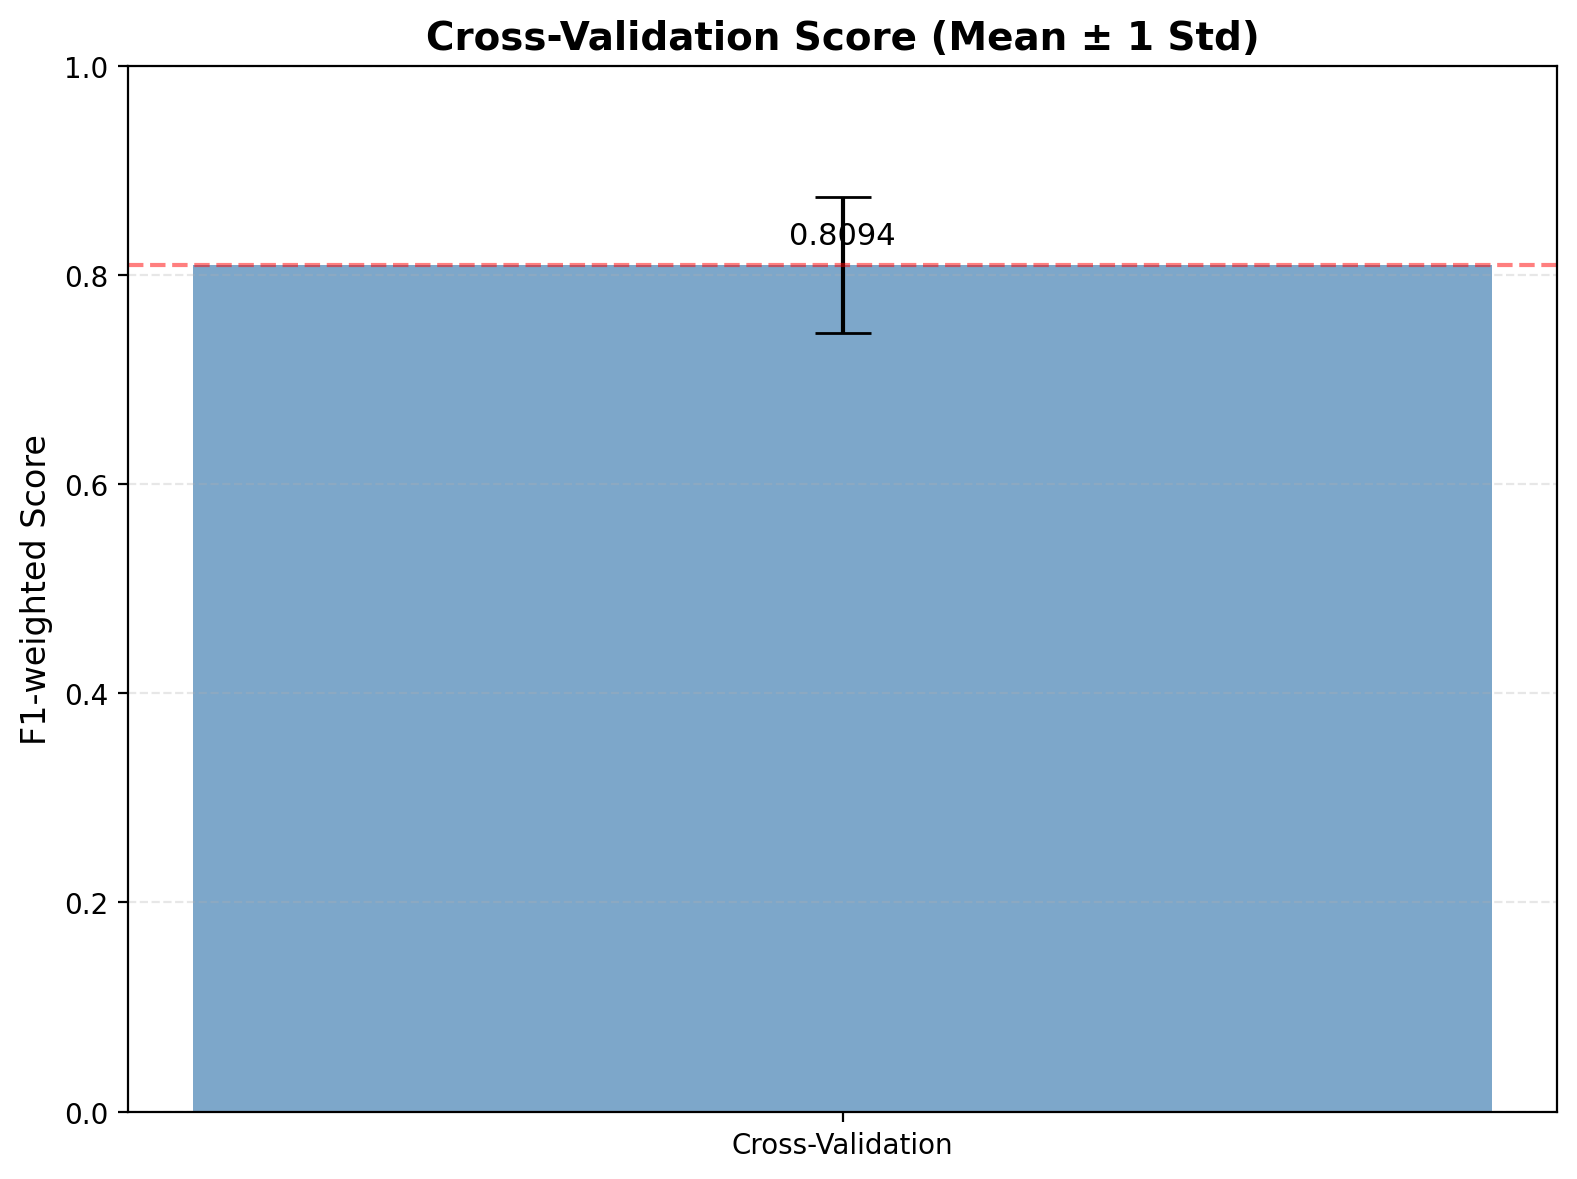

In [29]:
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Cross-Validation'], [mean_score],
        yerr=[std_score],
        capsize=10,
        alpha=0.7,
        color='steelblue',
        width=0.5)
plt.ylabel('F1-weighted Score', fontsize=12)
plt.title('Cross-Validation Score (Mean ± 1 Std)', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axhline(y=mean_score, color='red', linestyle='--', alpha=0.5)
plt.text(0, mean_score + 0.02, f'{mean_score:.4f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

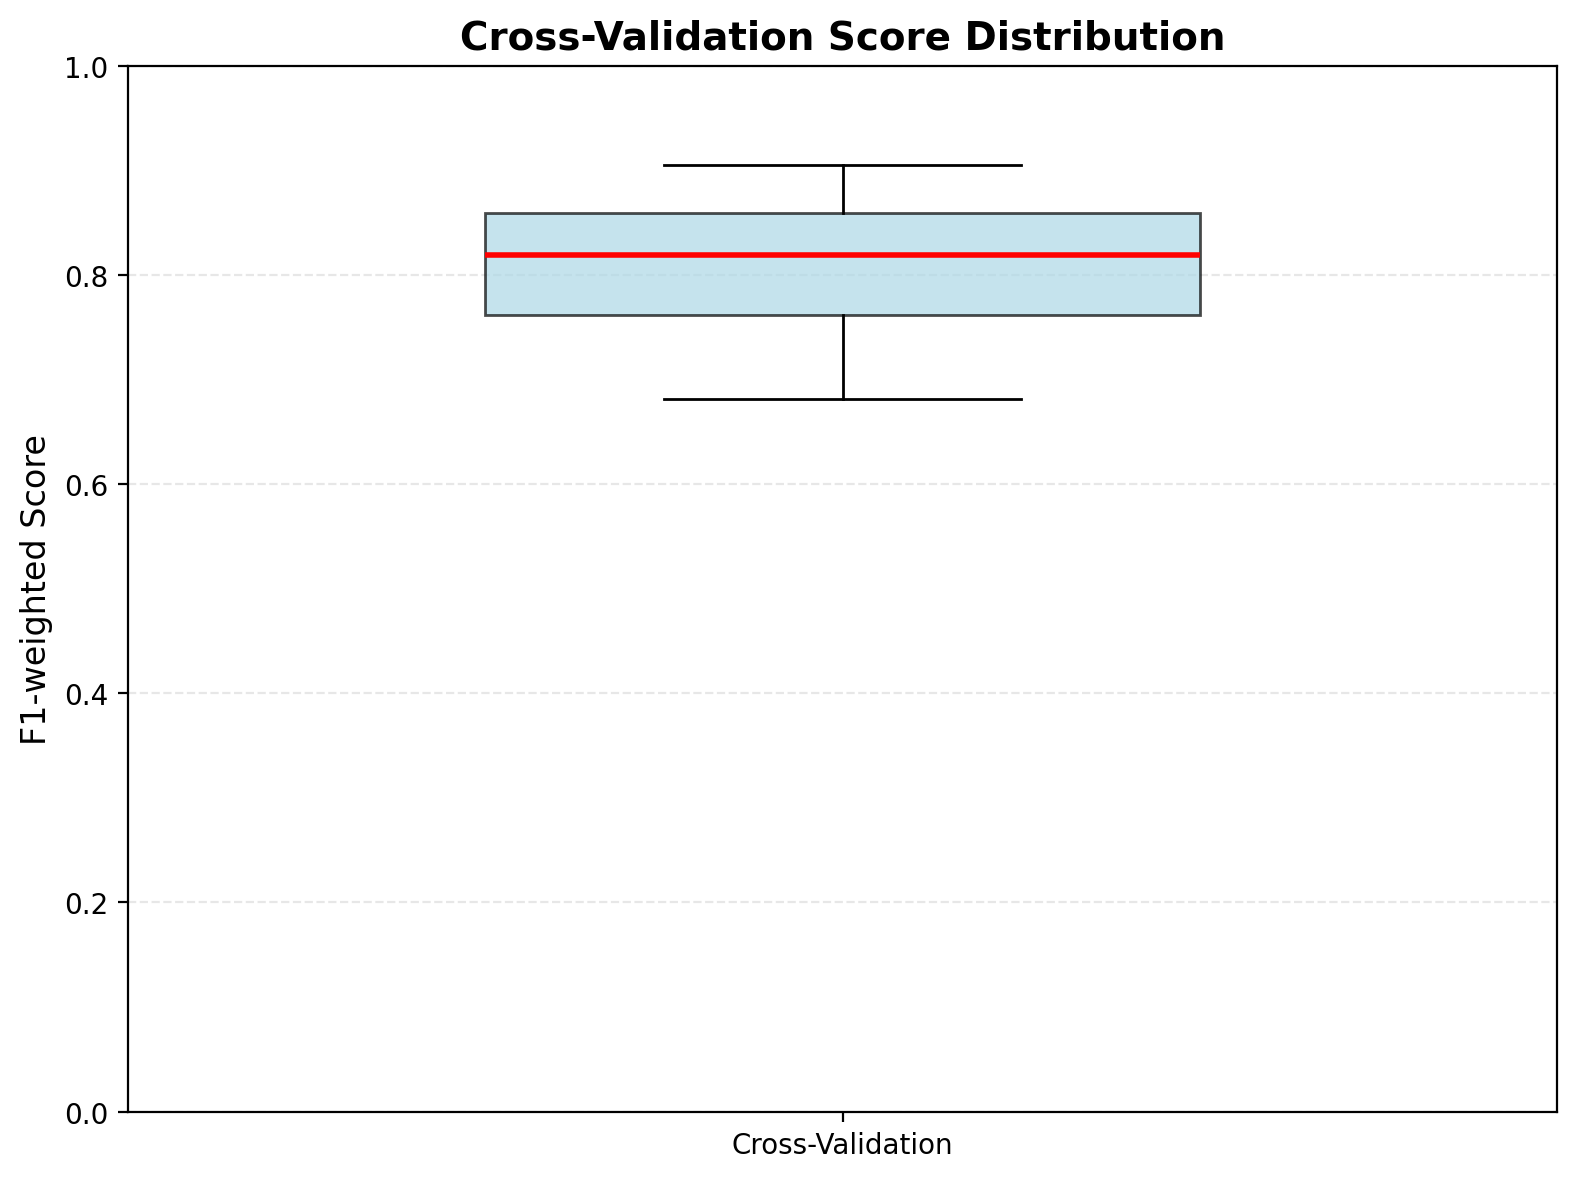

In [31]:
# Box plot
plt.figure(figsize=(8, 6))
bp = plt.boxplot([cv_scores],
                 tick_labels=['Cross-Validation'],
                 patch_artist=True,
                 widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_alpha(0.7)
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
plt.ylabel('F1-weighted Score', fontsize=12)
plt.title('Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [32]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}


We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below</span>

In [33]:
# Define the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA()),
    ('gnb', GaussianNB())
])

In [34]:
# Define the gridsearch using the pipeline and fit the model
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=10, 
    scoring=SCORINGS,
    return_train_score=True
)

grid_search.fit(X_full, y_full)

,estimator,Pipeline(step...aussianNB())])
,param_grid,"{'pca__n_components': [1, 2, ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_components,30


In [35]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value
print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"\nAll results:")
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_pca__n_components', 'mean_test_score', 'std_test_score']])

Best params: {'pca__n_components': 30}
Best score: 0.9154

All results:
   param_pca__n_components  mean_test_score  std_test_score
0                        1         0.302742        0.035861
1                        2         0.604333        0.041683
2                        5         0.818734        0.035047
3                       10         0.894148        0.030778
4                       20         0.910461        0.035177
5                       30         0.915444        0.035532
6                       40         0.912137        0.028334
7                       60         0.856819        0.055594


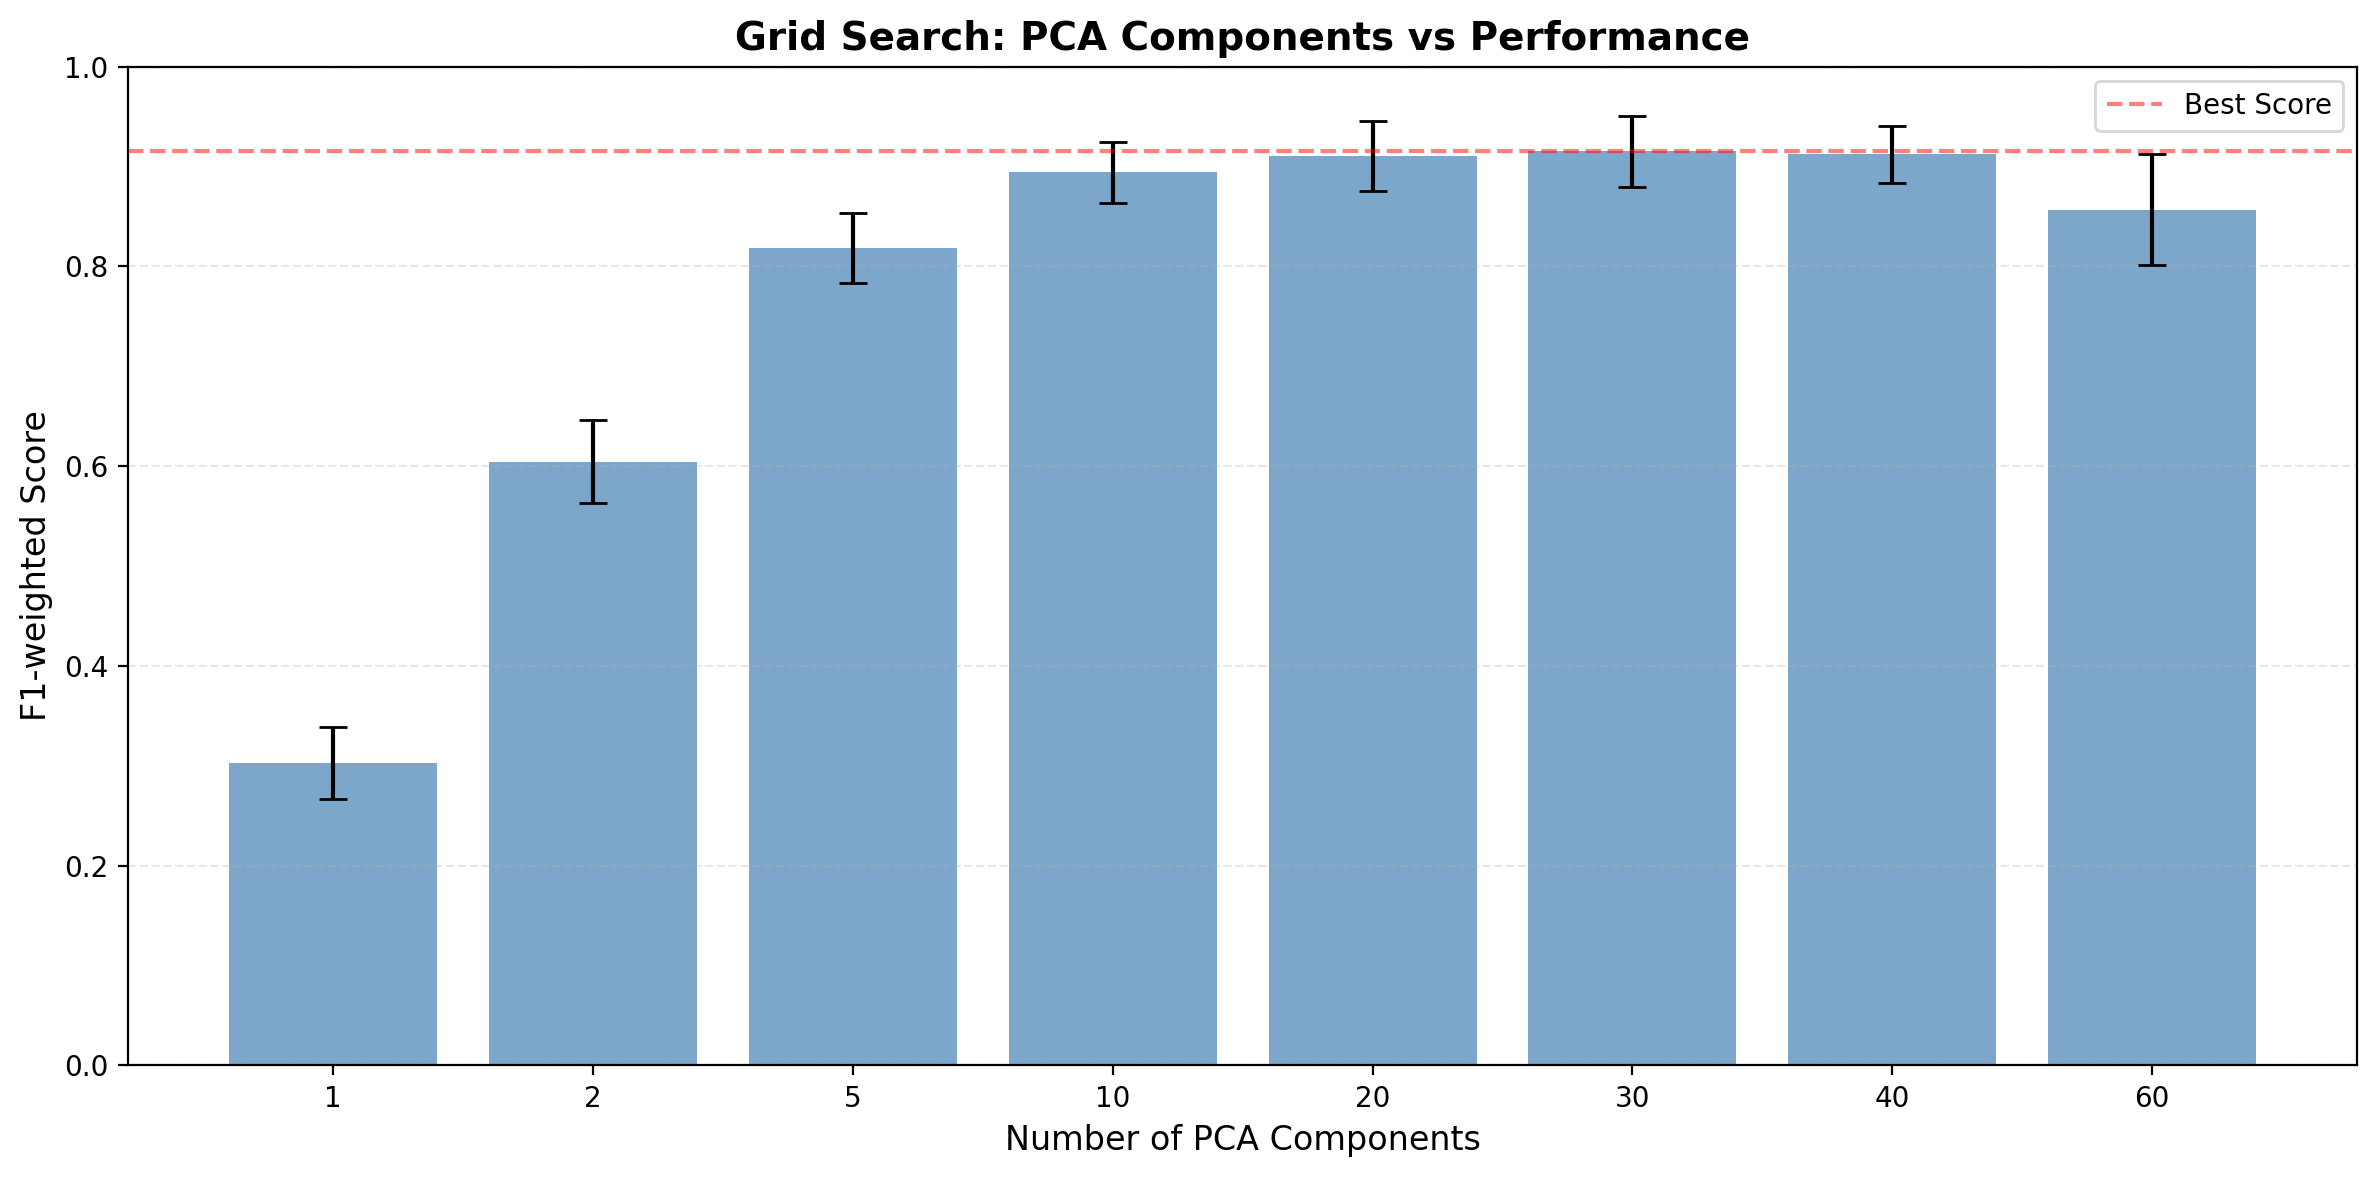

n_components= 1: 0.3027 ± 0.0359
n_components= 2: 0.6043 ± 0.0417
n_components= 5: 0.8187 ± 0.0350
n_components=10: 0.8941 ± 0.0308
n_components=20: 0.9105 ± 0.0352
n_components=30: 0.9154 ± 0.0355
n_components=40: 0.9121 ± 0.0283
n_components=60: 0.8568 ± 0.0556


In [36]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)

n_components_list = param_grid['pca__n_components']
mean_scores = results_df['mean_test_score'].values
std_scores = results_df['std_test_score'].values

# Bar plot with error bars
plt.figure(figsize=(12, 6))
plt.bar(range(len(n_components_list)), mean_scores, 
        yerr=std_scores, 
        capsize=5, 
        alpha=0.7, 
        color='steelblue')
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('F1-weighted Score', fontsize=12)
plt.title('Grid Search: PCA Components vs Performance', fontsize=14, fontweight='bold')
plt.xticks(range(len(n_components_list)), n_components_list)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axhline(y=grid_search.best_score_, color='red', linestyle='--', alpha=0.5, label='Best Score')
plt.legend()
plt.tight_layout()
plt.show()

# Print detailed results
for i, n_comp in enumerate(n_components_list):
    print(f"n_components={n_comp:2d}: {mean_scores[i]:.4f} ± {std_scores[i]:.4f}")


## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

In [ ]:
# convert multi-class to binary classification (e.g., detecting digit 8)
TARGET_DIGIT = 8

# create binary labels
y_train_binary = (y_train == TARGET_DIGIT).astype(int)
y_test_binary = (y_test == TARGET_DIGIT).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train_binary)

# Get predicted probabilities
y_proba_lr = lr.predict_proba(X_test)[:, 1]  


In [ ]:
# 3. 测试不同阈值的效果
thresholds_to_test = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]

print("performance in different thresholds:")

for threshold in thresholds_to_test:
    y_pred_threshold = (y_proba_lr >= threshold).astype(int)
    
    precision = precision_score(y_test_binary, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test_binary, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test_binary, y_pred_threshold, zero_division=0)
    
    print(f"\nThreshold = {threshold:.2f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

---